# Histogram Equalization
http://netpbm.sourceforge.net/doc/pgm.html

https://en.wikipedia.org/wiki/Histogram_equalization



In [21]:
import cvlib

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os 

#plt.style.use('dark_background') 
%matplotlib inline

PATH = '/Users/carlosalvarado/Desktop/ComputerVision/fotos/'

In [23]:
img = cv.imread(os.path.join(PATH,'subimage.pgm'), cv.IMREAD_GRAYSCALE)
#img = cv.imread(os.path.join(PATH,'Unequalized_Hawkes_Bay_NZ.jpg'), cv.IMREAD_GRAYSCALE)

r,c = img.shape[0:2]
print('Rows {0}\nColumns {1}\nPixels {2:,}'.format(r,c,r*c))

Rows 8
Columns 8
Pixels 64


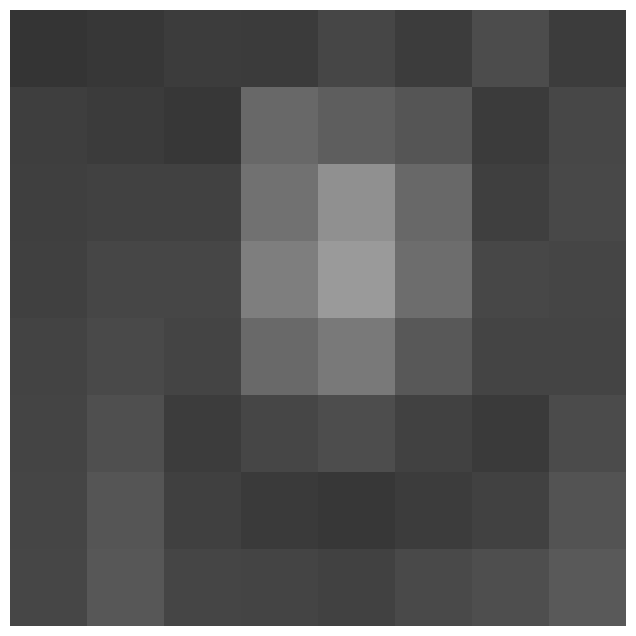

In [24]:
cvlib.imgview(img)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [2.]
 [3.]
 [1.]
 [4.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [1.]
 [5.]
 [3.]
 [5.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

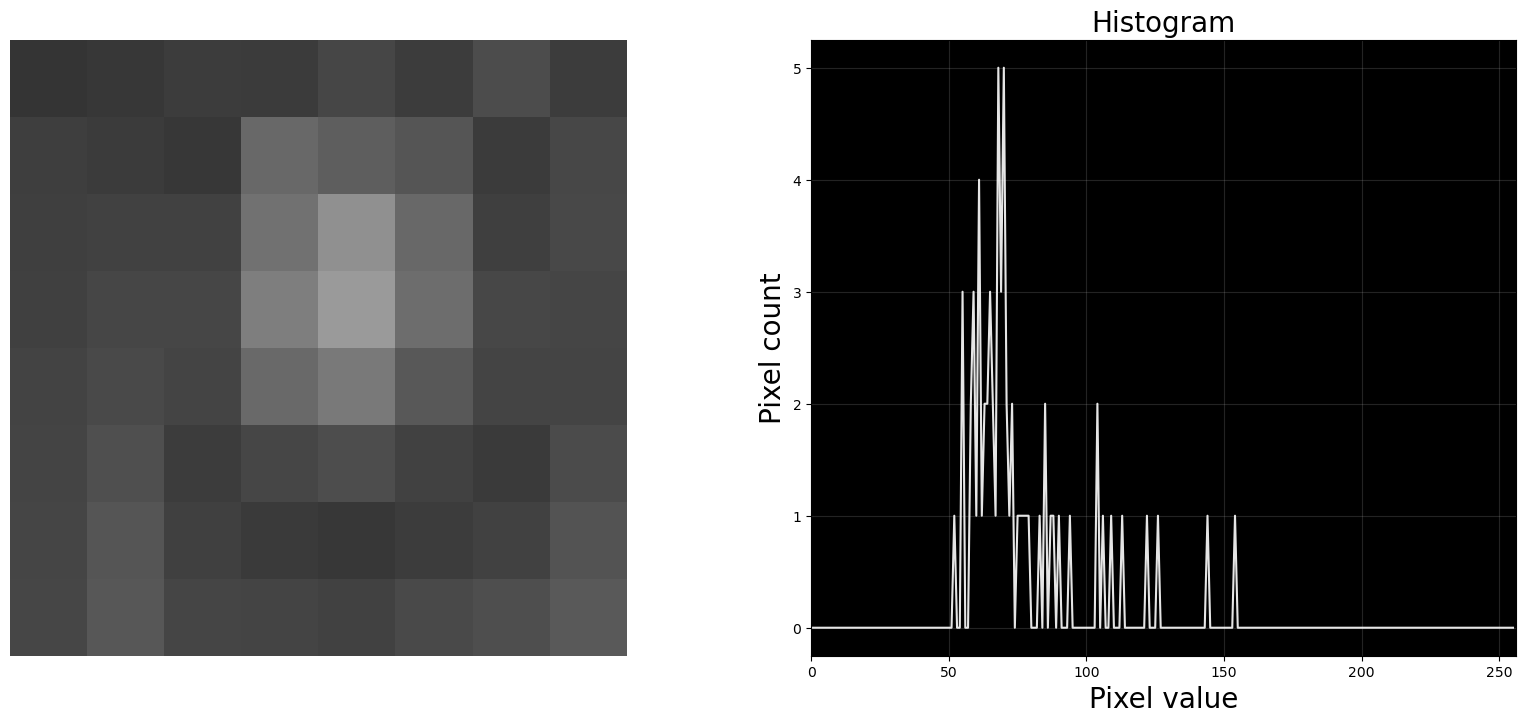

In [25]:
cvlib.hist(img)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [4.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [0.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [5.]
 [0.]
 [3.]
 [0.]
 [0.]
 [5.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

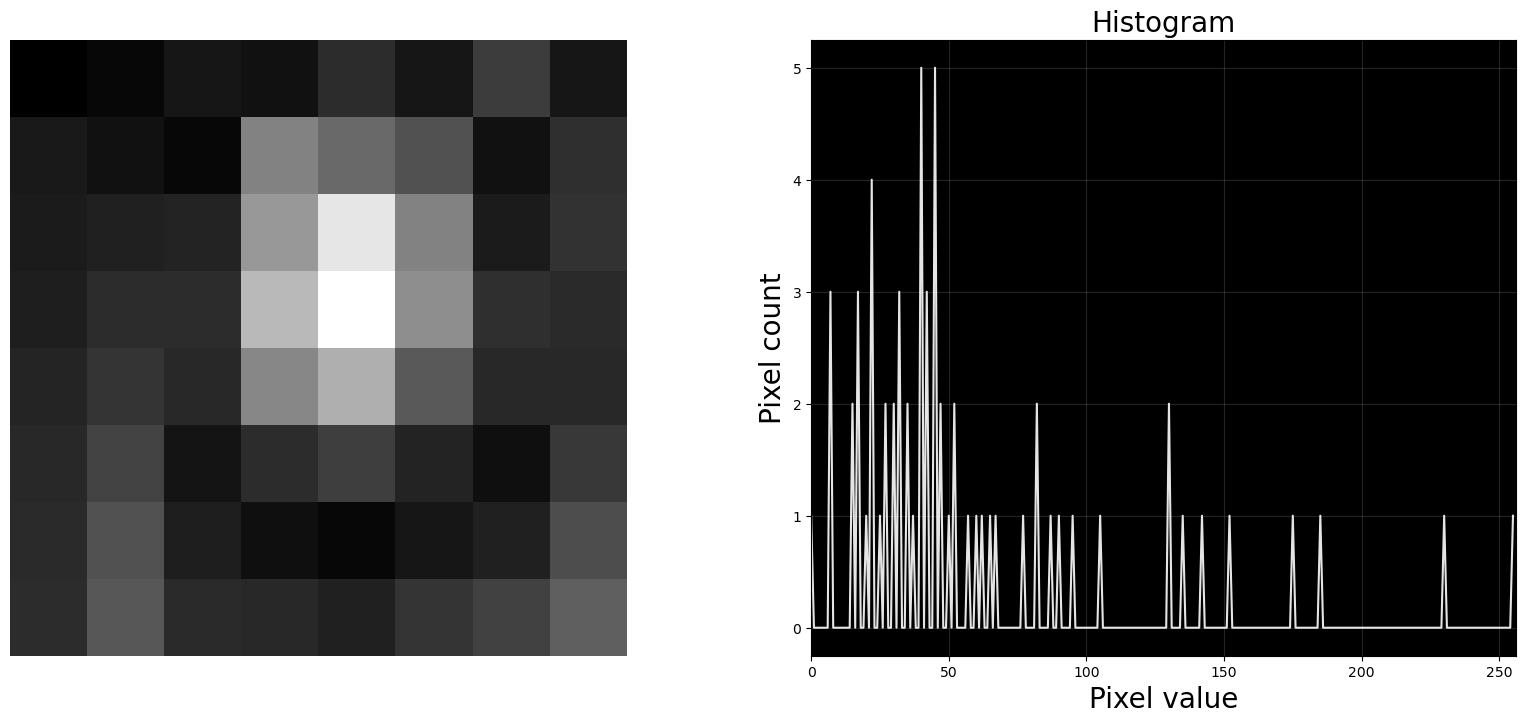

In [26]:
def imgnorm(img):
    """Nomalize an image
    Args:
        img (numpy array): Source image
    Returns:
        normalized (numpy array): Nomalized image
    """
    vmin, vmax = img.min(), img.max()
    normalized_values = []
    delta = vmax-vmin

    for p in img.ravel():
        normalized_values.append(255*(p-vmin)/delta)

    normalized  = np.array(normalized_values).astype(np.uint8).reshape(img.shape[0],-1)
    return normalized

cvlib.hist(imgnorm(img))

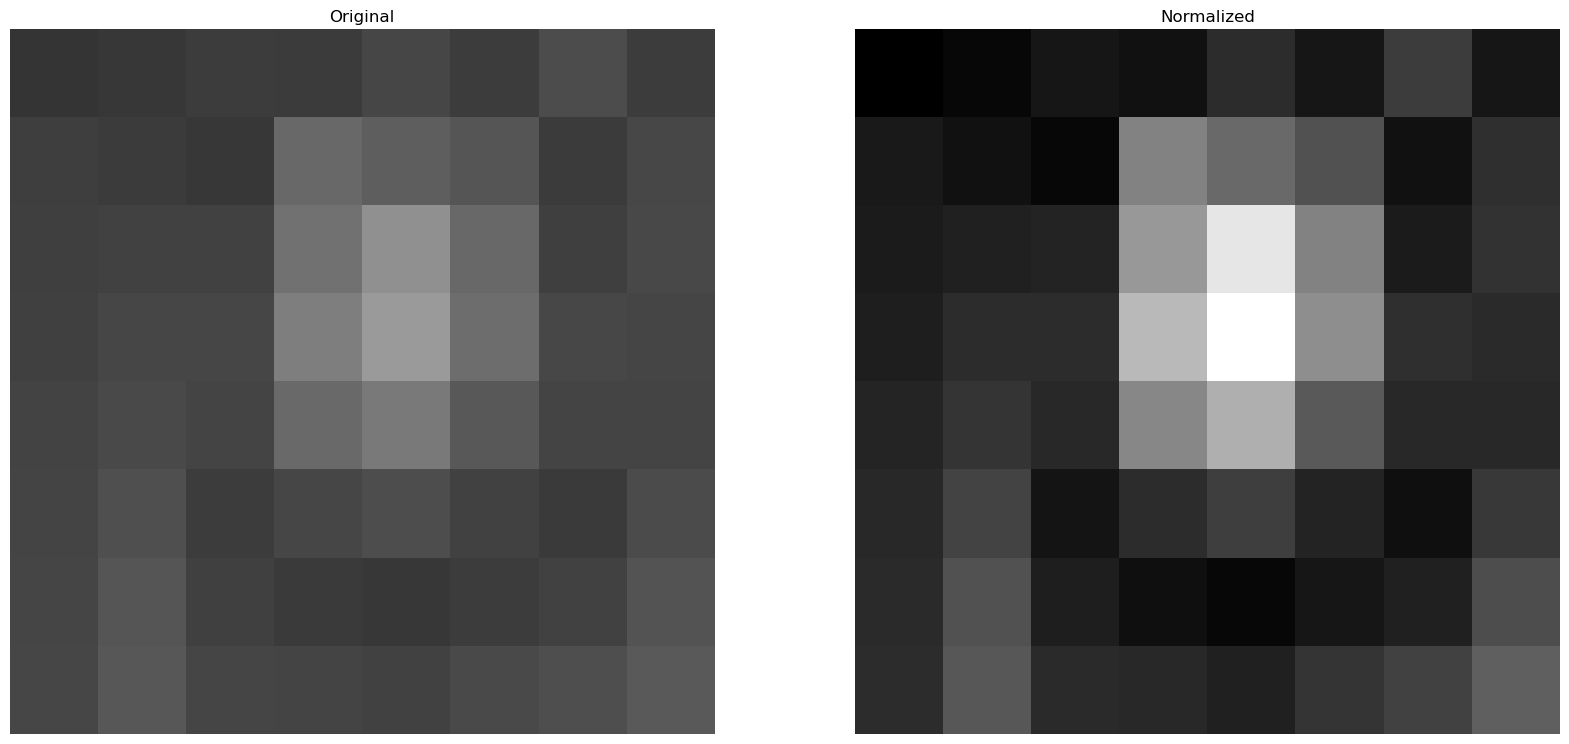

In [27]:
cvlib.imgcmp(img, imgnorm(img),['Original','Normalized'])

In [28]:
def imgcdf(img):
    """Compute the CDF on an image
    Args: 
        img (numpy array): Source image
    Returns:
        cdf (list): Computed CDf of img
        hist (list): Histogram of img
    """
    hist_list = cv.calcHist([img],[0],None,[256],[0,256])
    #hist = [(item) for sublist in hist_list for item in sublist]
    hist = hist_list.ravel()

    # define cdf placeholder
    cdf = []
    t = 0
    for p in hist:
        t += p
        cdf.append(t)
    return cdf, hist

cdf, hist = imgcdf(img)

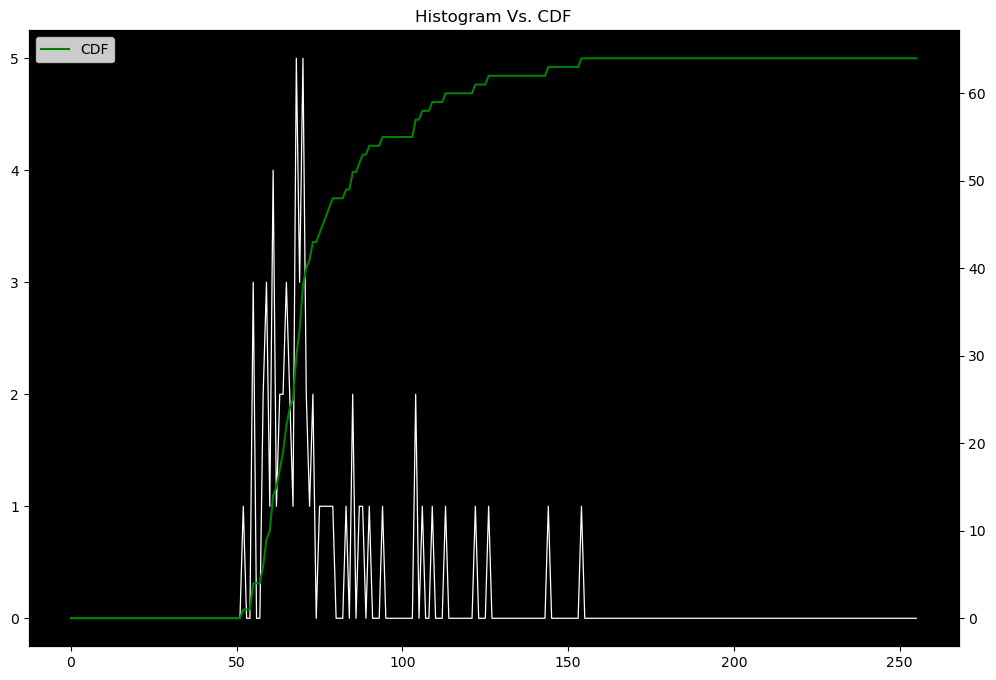

In [29]:
# current values
def cdfview(cdf, hist, filename=None):
    """Plots the CDF and histogram in a shared x axis
    Args:
        cdf [list]: CDF value to compare
        hist [list]: Histogram to compare
        filename [string]: Optional filename to save output
    Returns:
        None
    """
    fig, ax1 =plt.subplots(figsize=(12,8))
    ax2 = ax1.twinx()
    ax1.plot(hist, label='Value Prob',c='w', lw=0.9)
    ax2.plot(cdf, c='g', label='CDF')
    ax1.set_facecolor('k')
    ax1.set_title('Histogram Vs. CDF')
    ax2.legend()
    if filename != None:
        plt.savefig(filename)
    plt.show()
    return None
    
cdfview(cdf,hist)

In [30]:
def imgeq(img):
    """ Equalize a grayscale image
    Args:
        img (numpy array): Grayscale image to equalize
    Returns:
        eq (numpy array): Equalized image
    """
    cdf = imgcdf(img)[0]
    cdf_eq = []
    n = img.shape[0] * img.shape[1] #tamaño de la imagen
    m = min(i for i in cdf if i > 0) # min != 0 

    for i in cdf:
        if i >= m:
            cdf_eq.append(int(round(255*(i-m)/(n-m)))) #normalizamos el cdf
        else:
            cdf_eq.append(0)
    eq = cv.LUT(img, np.array(cdf_eq).astype(np.uint8))
    return eq

In [31]:
eq = imgeq(img)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [4.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

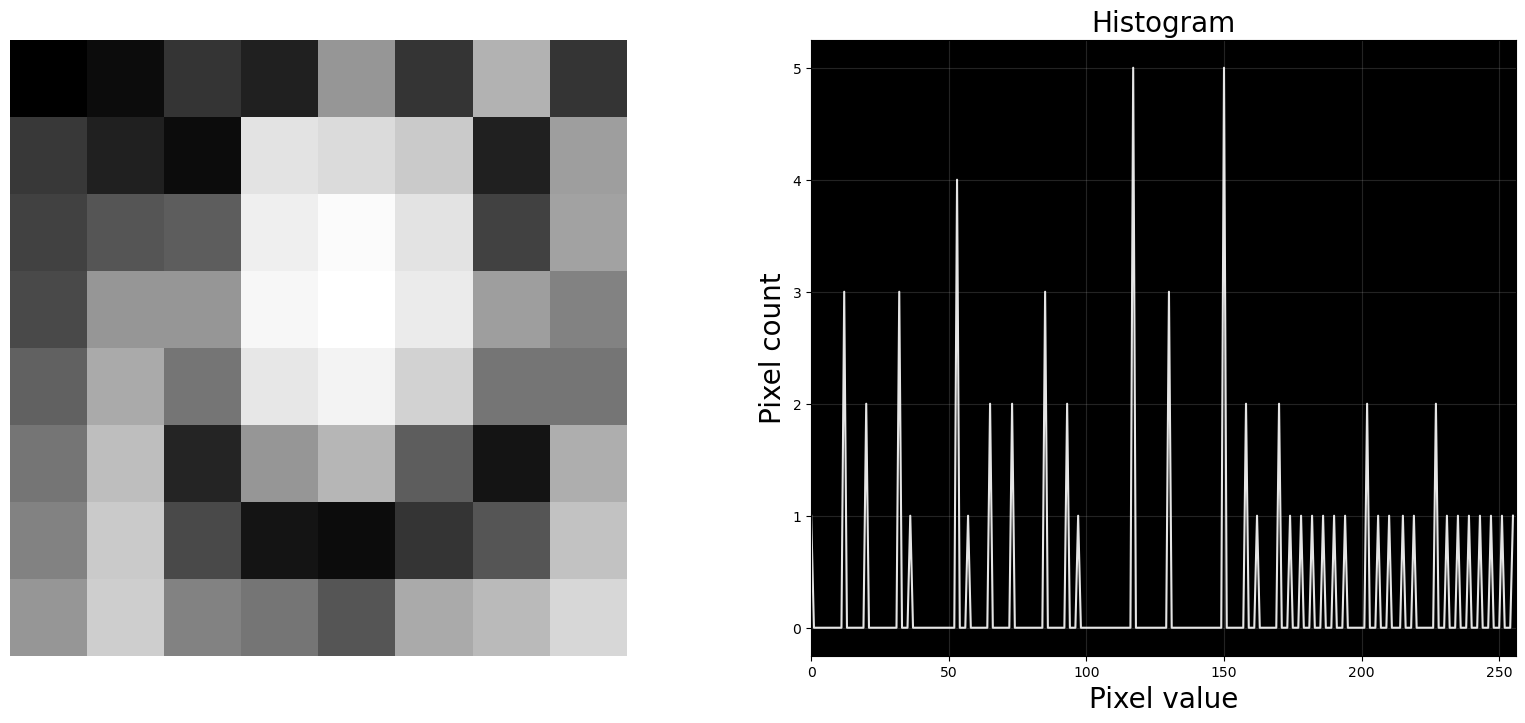

In [32]:
cvlib.hist(eq)

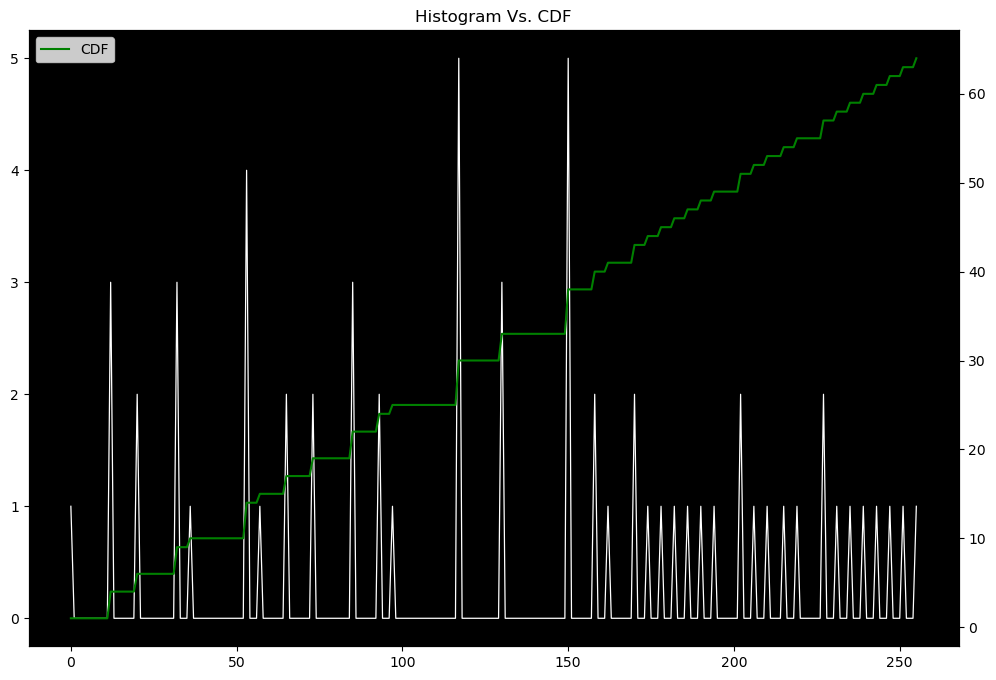

In [33]:
c,h = imgcdf(eq)
cdfview(c,h)

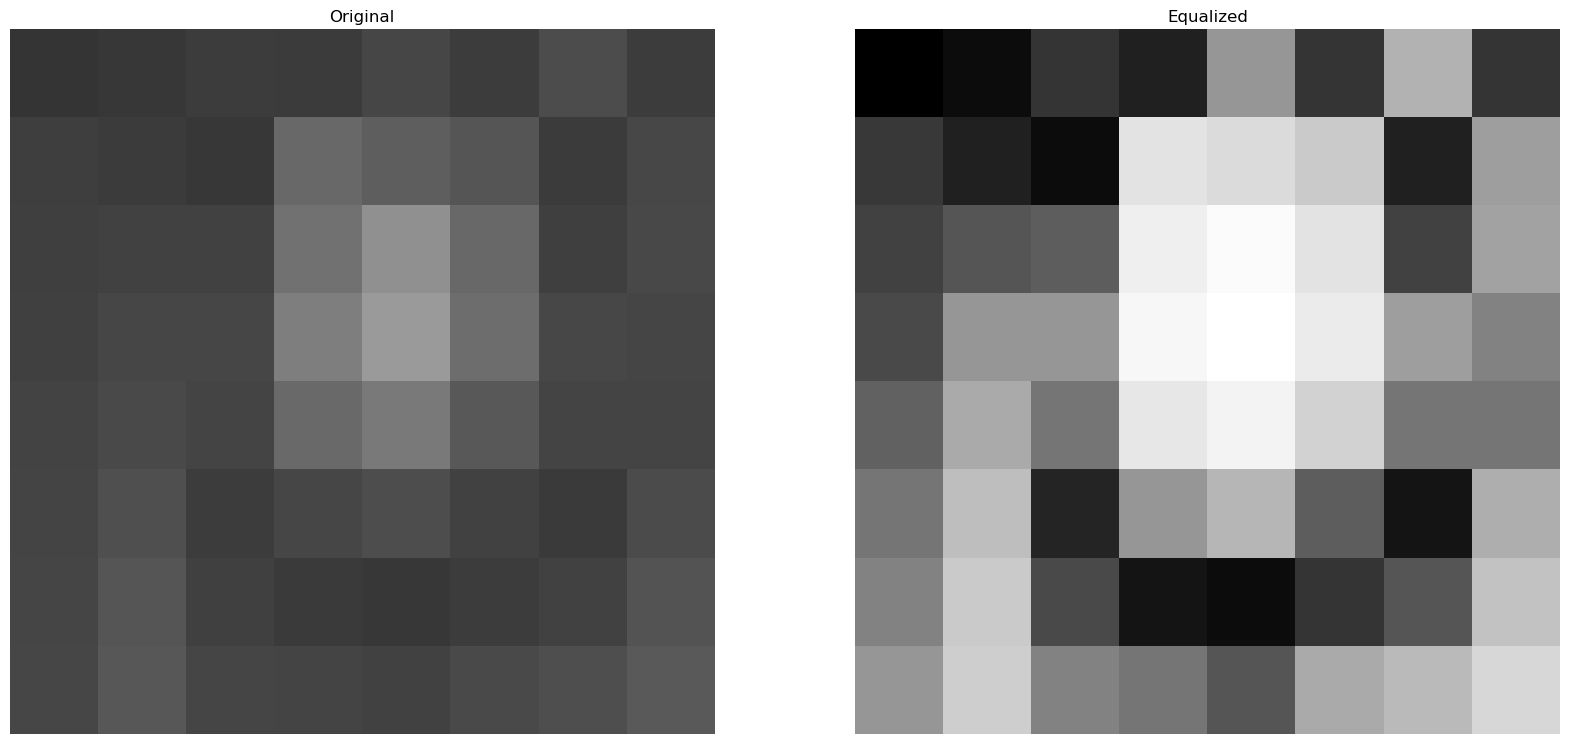

In [34]:
cvlib.imgcmp(img, eq,['Original','Equalized'])

# Advanced Plotting

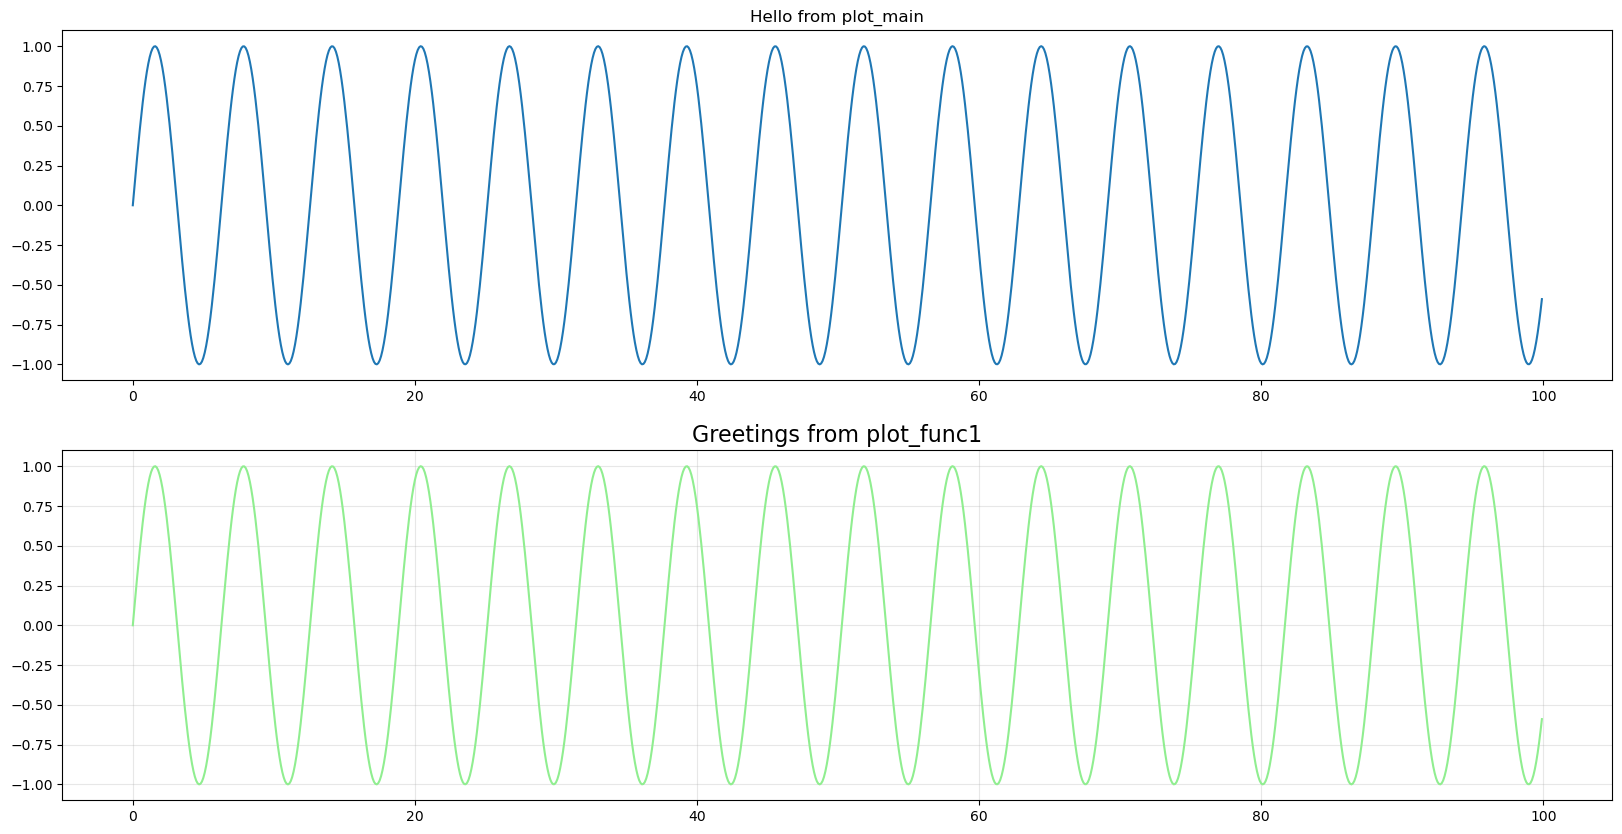

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_aux(x, y, ax):
    ax.set_title('Greetings from plot_func1',fontsize=16)
    ax.plot(x,y,c='lightgreen')
    ax.grid(alpha=0.3)
    

def plot_main(x,y):
    """Sample code for advanced plotting.
    Reuse code whenever possible. This sample code shows how to reuse
    plotting objects from matplotlib
    """

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Hello from plot_main')
    ax1.plot(x,y)
    
    ax2 = fig.add_subplot(212)
    plot_aux(x,y,ax2)
    
    plt.show()
    

x = np.arange(0, 100, 0.1)
y = np.sin(x)

plot_main(x,y)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
img = cv.imread(PATH+'Unequalized_Hawkes_Bay_NZ.jpg', cv.IMREAD_GRAYSCALE)

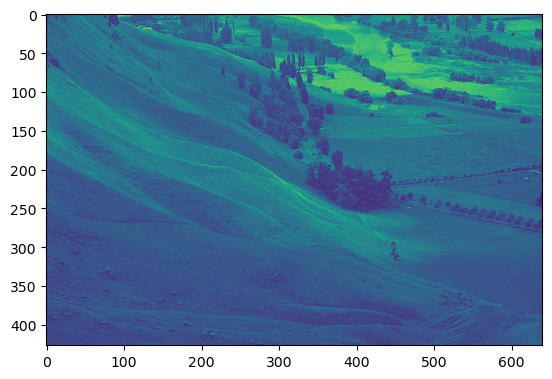

In [38]:
def plot_1(im):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(im)
    plt.show()

plot_1(img)

[[0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.00

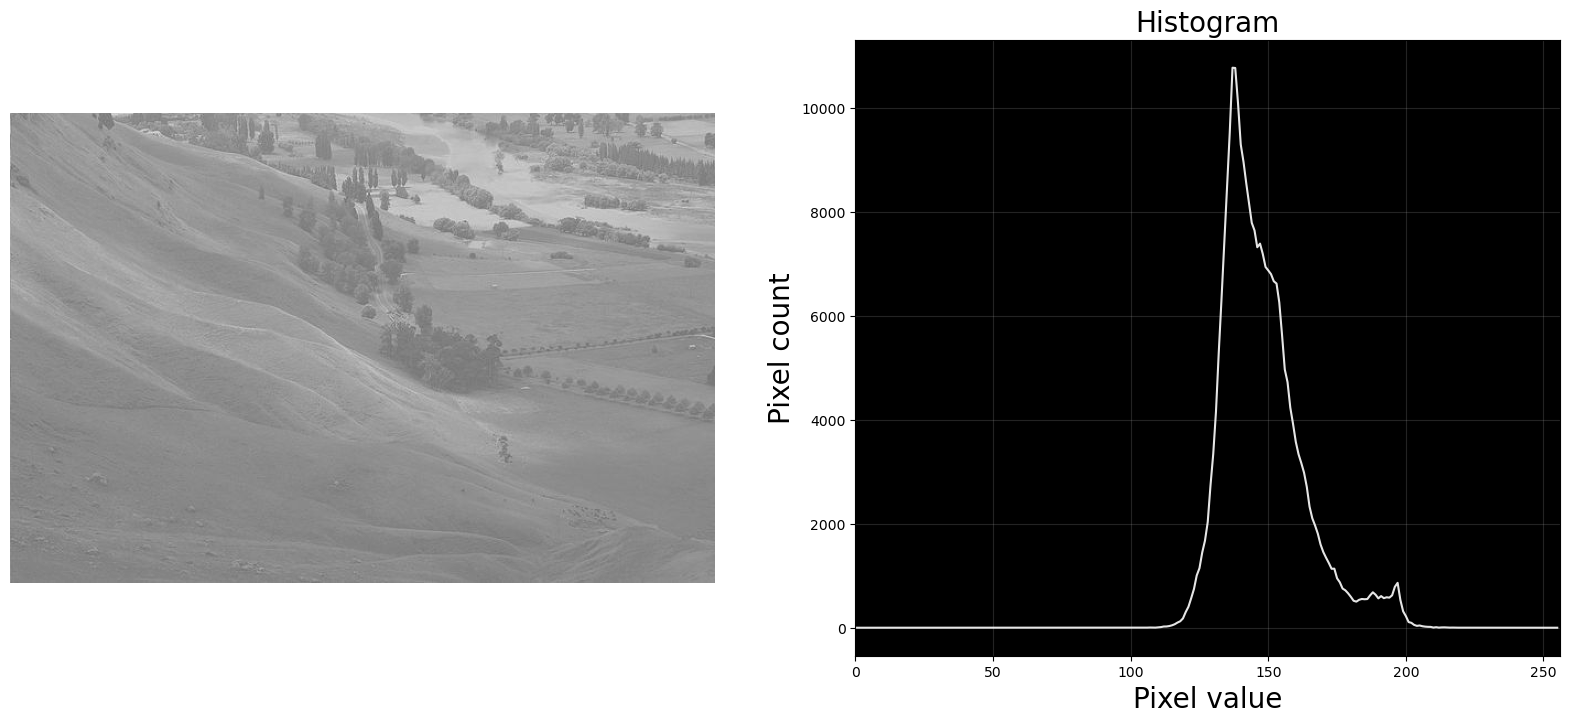

In [39]:
cvlib.hist(img)

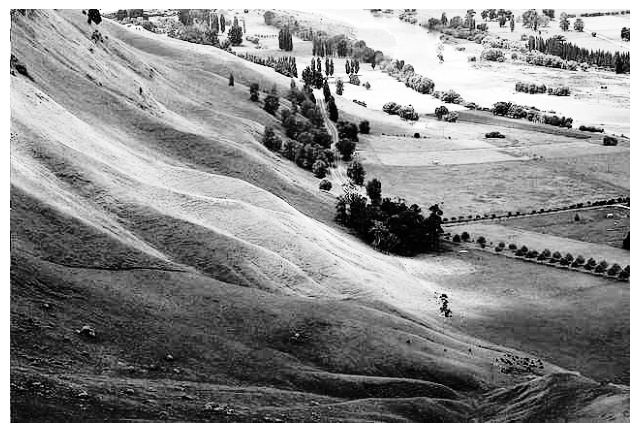

In [40]:
img2 = cvlib.imgeq(img)
cvlib.imgview(img2)